# Lab: Regression Analysis

### Before you start:

* Read the README.md file
* Comment as much as you can and use the resources (README.md file) 

Happy learning!

## Challenge 1
I work at a coding bootcamp, and I have developed a theory that the younger my students are, the more often they are late to class. In order to test my hypothesis, I have collected some data in the following table:

| StudentID | Age | Tardies |
|--------|-----|------------|
| 1      | 17  | 10         |
| 2      | 51  | 1          |
| 3      | 27  | 5          |
| 4      | 21  | 9         |
| 5      | 36  |  4         |
| 6      | 48  |  2         |
| 7      | 19  |  9         |
| 8      | 26  | 6          |
| 9      | 54  |  0         |
| 10     | 30  |  3         |

Use this command to create a dataframe with the data provided in the table. 
~~~~
student_data = pd.DataFrame({'X': [x_values], 'Y': [y_values]})
~~~~

In [1]:
import pandas as pd
from sklearn.datasets import load_boston
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
import statsmodels.formula.api as smf

In [2]:
student_data = pd.DataFrame({'age': [17,51,27,21,36,48,19,26,54,30], 'tardies': [10,1,5,9,4,2,9,6,0,3]})

In [3]:
student_data

,age,tardies
0,17,10
1,51,1
2,27,5
3,21,9
4,36,4
5,48,2
6,19,9
7,26,6
8,54,0
9,30,3


Draw a dispersion diagram (scatter plot) for the data.

<function matplotlib.pyplot.show(close=None, block=None)>

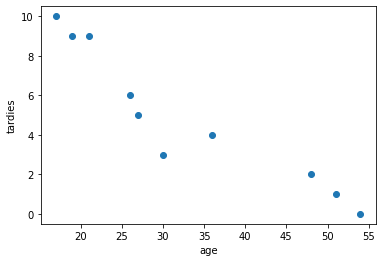

In [4]:
plt.scatter(student_data.age,student_data.tardies,)
plt.ylabel("tardies")
plt.xlabel("age")
plt.show

Do you see a trend? Can you make any hypotheses about the relationship between age and number of tardies?

In [5]:
# Yes there is a notable trend

Calculate the covariance and correlation of the variables in your plot. What is the difference between these two measures? Compare their values. What do they tell you in this case? Add your responses as comments after your code.

In [6]:
student_data.corr()
#if it´s close to +1 or -1 it means that they are related. 

,age,tardies
age,1.000000,-0.939163
tardies,-0.939163,1.000000


In [7]:
student_data.cov()

,age,tardies
age,187.655556,-45.566667
tardies,-45.566667,12.544444


- The correlation coefficients are standardized. Therefore, a perfect linear relationship results in a coefficient of 1. 
    The correlation measures both the strength and direction of the linear relationship between two variables.
- The covariance values are not standardized.Therefore, the value of a perfect linear relationship depends on the data. 
    Since the data are not standardized, it is difficult to determine the strength of the relationship between the variables.

Build a regression model for this data. What will be your outcome variable? What type of regression are you using? Add your responses as comments after your code.

In [8]:
lr = LinearRegression()

In [9]:
X = student_data[['age']]
y = student_data.tardies

lr.fit(X, y)

LinearRegression()

In [10]:
student_data['tardies_predict'] = lr.predict(X)

In [11]:
student_data

,age,tardies,tardies_predict
0,17,10,8.760850
1,51,1,0.504944
2,27,5,6.332643
3,21,9,7.789567
4,36,4,4.147256
5,48,2,1.233406
6,19,9,8.275209
7,26,6,6.575463
8,54,0,-0.223518
9,30,3,5.604180


Plot your regression model on your scatter plot.

<function matplotlib.pyplot.show(close=None, block=None)>

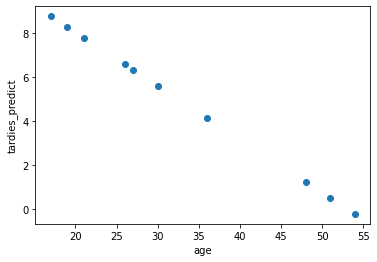

In [12]:
plt.scatter(student_data.age,student_data.tardies_predict,)
plt.ylabel("tardies_predict")
plt.xlabel("age")
plt.show

Interpret the results of your model. What can conclusions can you draw from your model and how confident in these conclusions are you? Can we say that age is a good predictor of tardiness? Add your responses as comments after your code.

In [13]:
results = smf.ols("tardies ~ age", data = student_data).fit()
results.summary()
#The sample is to small to be confident with the conclusions, but if we don´t take that into account we can say that age can be a good predictor of tardiness
#The R-squared is very close to 1 

C:\Users\Usuario\anaconda3\envs\kepler\lib\site-packages\scipy\stats\stats.py:1603: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=10
  warnings.warn("kurtosistest only valid for n>=20 ... continuing "


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                tardies   R-squared:                       0.882
Model:                            OLS   Adj. R-squared:                  0.867
Method:                 Least Squares   F-statistic:                     59.81
Date:                Tue, 27 Apr 2021   Prob (F-statistic):           5.57e-05
Time:                        16:56:30   Log-Likelihood:                -15.622
No. Observations:                  10   AIC:                             35.24
Df Residuals:                       8   BIC:                             35.85
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     12.8888      1.111     11.605      0.000      10.328      15.450
age           -0.2428      0.031     -7.734      0.000      -0.315      -0.170
==============================================================================
Omnibus:                        3.949   Durbin-Watson:                   1.754
Prob(Omnibus):                  0.139   Jarque-Bera (JB):                1.714
Skew:                          -1.014   Prob(JB):                        0.424
Kurtosis:                       3.069   Cond. No.                         96.4
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

## Challenge 2
For the second part of this lab, we will use the vehicles.csv data set. You can find a copy of the dataset in the git hub folder. This dataset includes variables related to vehicle characteristics, including the model, make, and energy efficiency standards, as well as each car's CO2 emissions. As discussed in class the goal of this exercise is to predict vehicles' CO2 emissions based on several independent variables. 

In [14]:
data = pd.read_csv("vehicles.csv",encoding = "ISO-8859-1")
data.columns

Index(['Make', 'Model', 'Year', 'Engine Displacement', 'Cylinders',
       'Transmission', 'Drivetrain', 'Vehicle Class', 'Fuel Type',
       'Fuel Barrels/Year', 'City MPG', 'Highway MPG', 'Combined MPG',
       'CO2 Emission Grams/Mile', 'Fuel Cost/Year'],
      dtype='object')

Let's use the following variables for our analysis: Year, Cylinders, Fuel Barrels/Year, Combined MPG, and Fuel Cost/Year. We will use 'CO2 Emission Grams/Mile' as our outcome variable. 

Calculate the correlations between each of these variables and the outcome. Which variable do you think will be the most important in determining CO2 emissions? Which provides the least amount of helpful information for determining CO2 emissions? Add your responses as comments after your code.

In [15]:
data1 = data[['Year']+['Cylinders']+['Fuel Barrels/Year']+['Combined MPG']+['Fuel Cost/Year']+['CO2 Emission Grams/Mile']]

In [78]:
data1.corr()

,Year,Cylinders,Fuel Barrels/Year,Combined MPG,Fuel Cost/Year,CO2 Emission Grams/Mile
Year,1.000000,0.082469,-0.221084,0.204751,-0.091913,-0.222300
Cylinders,0.082469,1.000000,0.739517,-0.698648,0.778153,0.752393
Fuel Barrels/Year,-0.221084,0.739517,1.000000,-0.909743,0.916208,0.986189
Combined MPG,0.204751,-0.698648,-0.909743,1.000000,-0.875185,-0.926229
Fuel Cost/Year,-0.091913,0.778153,0.916208,-0.875185,1.000000,0.930865
CO2 Emission Grams/Mile,-0.222300,0.752393,0.986189,-0.926229,0.930865,1.000000


In [17]:
#The most important variable is Fuel Barrels/Year, it has the better correlation with our outcome variable

Build a regression model for this data. What type of regression are you using? Add your responses as comments after your code.

In [18]:
X = data[['Year']+['Cylinders']+['Fuel Barrels/Year']+['Combined MPG']+['Fuel Cost/Year']]
y = data['CO2 Emission Grams/Mile']

lr.fit(X, y)

LinearRegression()

In [19]:
data["CO2_predict"] = lr.predict(X)

Print your regression summary, and interpret the results. What are the most important varibles in your model and why? What can conclusions can you draw from your model and how confident in these conclusions are you? Add your responses as comments after your code.

In [31]:
columnas = list(data.columns)
columnas_bar = [str(columna).replace("/", "") for columna in columnas]
data.columns = columnas_bar

In [32]:
columnas_space = [str(columna).replace(" ", "_") for columna in columnas]
data.columns = columnas_space

In [34]:
results = smf.ols("CO2_Emission_GramsMile ~ Year + Cylinders + Fuel_BarrelsYear + Combined_MPG + Fuel_CostYear", data = data).fit()
results.summary()
#The model has a R-squared of 0.981, it means that is a very powerfull predict model. The most important variables are the ones in which the std err is near to 0

<class 'statsmodels.iolib.summary.Summary'>
"""
                              OLS Regression Results                              
==================================================================================
Dep. Variable:     CO2_Emission_GramsMile   R-squared:                       0.981
Model:                                OLS   Adj. R-squared:                  0.981
Method:                     Least Squares   F-statistic:                 3.687e+05
Date:                    Tue, 27 Apr 2021   Prob (F-statistic):               0.00
Time:                            16:57:58   Log-Likelihood:            -1.5173e+05
No. Observations:                   35952   AIC:                         3.035e+05
Df Residuals:                       35946   BIC:                         3.035e+05
Df Model:                               5                                         
Covariance Type:                nonrobust                                         
====================================================================================
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
Intercept          769.8883     19.392     39.702      0.000     731.880     807.897
Year                -0.3206      0.010    -33.060      0.000      -0.340      -0.302
Cylinders            1.8788      0.083     22.598      0.000       1.716       2.042
Fuel_BarrelsYear    19.0529      0.061    311.600      0.000      18.933      19.173
Combined_MPG        -3.0404      0.042    -71.645      0.000      -3.124      -2.957
Fuel_CostYear        0.0323      0.000     67.025      0.000       0.031       0.033
==============================================================================
Omnibus:                    71055.645   Durbin-Watson:                   0.747
Prob(Omnibus):                  0.000   Jarque-Bera (JB):        246941260.782
Skew:                          15.902   Prob(JB):                         0.00
Kurtosis:                     407.766   Cond. No.                     6.20e+05
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 6.2e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [87]:
results = smf.ols("CO2_Emission_GramsMile ~ Year + Fuel_BarrelsYear + Fuel_CostYear", data = data).fit()
results.summary()
#In my opinion, this model is also very usefull, the R-squared is quite similar but I think is better the other one, 
# because you have more variables, and you are more 'safe' to possible changes in one variables

<class 'statsmodels.iolib.summary.Summary'>
"""
                              OLS Regression Results                              
==================================================================================
Dep. Variable:     CO2_Emission_GramsMile   R-squared:                       0.978
Model:                                OLS   Adj. R-squared:                  0.978
Method:                     Least Squares   F-statistic:                 5.283e+05
Date:                    Tue, 27 Apr 2021   Prob (F-statistic):               0.00
Time:                            17:52:20   Log-Likelihood:            -1.5439e+05
No. Observations:                   35952   AIC:                         3.088e+05
Df Residuals:                       35948   BIC:                         3.088e+05
Df Model:                               3                                         
Covariance Type:                nonrobust                                         
====================================================================================
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
Intercept          635.8459     19.916     31.926      0.000     596.809     674.882
Year                -0.3116      0.010    -31.429      0.000      -0.331      -0.292
Fuel_BarrelsYear    21.5306      0.056    387.125      0.000      21.422      21.640
Fuel_CostYear        0.0442      0.000     92.123      0.000       0.043       0.045
==============================================================================
Omnibus:                    77350.252   Durbin-Watson:                   0.797
Prob(Omnibus):                  0.000   Jarque-Bera (JB):        407142393.263
Skew:                          19.293   Prob(JB):                         0.00
Kurtosis:                     522.905   Cond. No.                     5.91e+05
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 5.91e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

## Bonus Challenge: Error Analysis

I am suspicious about the last few parties I have thrown: it seems that the more people I invite the more people are unable to attend. To know if my hunch is supported by data, I have decided to do an analysis. I have collected my data in the table below, where X is the number of people I invited, and Y is the number of people who attended. 

|  X |  Y |
|----|----|
| 1  |  1 |
| 3  |  2 |
| 4  |  4 |
| 6  |  4 |
| 8  |  5 |
| 9  |  7 |
| 11 |  8 |
| 14 |  13 |

We want to know if the relationship modeled by the two random variables is linear or not, and therefore if it is appropriate to model it with a linear regression. 
First, build a dataframe with the data. 

In [56]:
party = pd.DataFrame({'invited': [1,3,4,6,8,9,11,14], 'not_attend': [1-1,3-2,4-4,6-4,8-5,9-7,11-8,14-13]})

Draw a dispersion diagram (scatter plot) for the data, and fit a regression line.

In [57]:
lr.fit(

    X = party[["invited"]],
    y = party.not_attend
)
beta_1 = lr.coef_[0]
beta_0 = lr.intercept_

<function matplotlib.pyplot.show(close=None, block=None)>

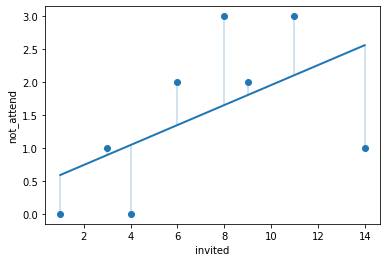

In [58]:
y_hat = beta_0 + beta_1 * party["invited"] #Línea de regresión
plt.scatter(party["invited"], party.not_attend) # pintar los puntos
plt.plot(party["invited"], y_hat, lw=2) # pintamos la línea de regresión
plt.vlines(party["invited"], y_hat, party.not_attend, lw = 0.4) # pintamos las líneas que van desde los puntos a la línea
plt.xlabel("invited")
plt.ylabel("not_attend")
plt.show

What do you see? What does this plot tell you about the likely relationship between the variables? Print the results from your regression.

In [2]:
#In my opinion I don´t see a strong relation between these two variables

In [59]:
X = party[["invited"]]
y = party.not_attend

lr.fit(X, y)

LinearRegression()

In [60]:
party["not_attend_predict"] = lr.predict(X)

In [61]:
party

,invited,not_attend,not_attend_predict
0,1,0,0.590909
1,3,1,0.893939
2,4,0,1.045455
3,6,2,1.348485
4,8,3,1.651515
5,9,2,1.803030
6,11,3,2.106061
7,14,1,2.560606


In [75]:
results = smf.ols("not_attend ~ not_attend_predict", data = party).fit()
results.summary()

C:\Users\Usuario\anaconda3\envs\kepler\lib\site-packages\scipy\stats\stats.py:1603: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=8
  warnings.warn("kurtosistest only valid for n>=20 ... continuing "


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:             not_attend   R-squared:                       0.303
Model:                            OLS   Adj. R-squared:                  0.187
Method:                 Least Squares   F-statistic:                     2.609
Date:                Tue, 27 Apr 2021   Prob (F-statistic):              0.157
Time:                        17:33:39   Log-Likelihood:                -10.800
No. Observations:                   8   AIC:                             25.60
Df Residuals:                       6   BIC:                             25.76
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
======================================================================================
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
Intercept          -6.661e-16      1.004  -6.64e-16      1.000      -2.456       2.456
not_attend_predict     1.0000      0.619      1.615      0.157      -0.515       2.515
==============================================================================
Omnibus:                        0.556   Durbin-Watson:                   1.867
Prob(Omnibus):                  0.757   Jarque-Bera (JB):                0.514
Skew:                          -0.261   Prob(JB):                        0.773
Kurtosis:                       1.873   Cond. No.                         5.72
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

Do you see any problematic points, or outliers, in your data? Remove these points and recalculate your regression. Print the new dispersion diagram with your new model and the results of your model. 

In [68]:
#Maybe the party of 4 and 14 people it´s influencing our model.

In [69]:
party2 = pd.DataFrame({'invited': [1,3,6,8,9,11], 'not_attend': [1-1,3-2,6-4,8-5,9-7,11-8]})

In [70]:
lr.fit(

    X = party2[["invited"]],
    y = party2.not_attend
)
beta_1 = lr.coef_[0]
beta_0 = lr.intercept_

<function matplotlib.pyplot.show(close=None, block=None)>

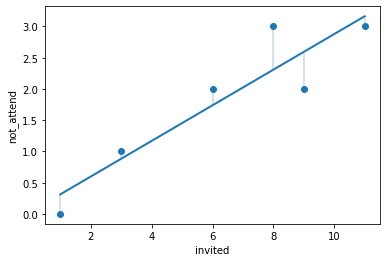

In [71]:
y_hat = beta_0 + beta_1 * party2["invited"] #Línea de regresión
plt.scatter(party2["invited"], party2.not_attend) # pintar los puntos
plt.plot(party2["invited"], y_hat, lw=2) # pintamos la línea de regresión
plt.vlines(party2["invited"], y_hat, party2.not_attend, lw = 0.4) # pintamos las líneas que van desde los puntos a la línea
plt.xlabel("invited")
plt.ylabel("not_attend")
plt.show

In [72]:
X = party2[["invited"]]
y = party2.not_attend

lr.fit(X, y)

LinearRegression()

In [73]:
party2["not_attend_predict"] = lr.predict(X)

In [74]:
party2

,invited,not_attend,not_attend_predict
0,1,0,0.313084
1,3,1,0.883178
2,6,2,1.738318
3,8,3,2.308411
4,9,2,2.593458
5,11,3,3.163551


In [76]:
results = smf.ols("not_attend ~ not_attend_predict", data = party2).fit()
results.summary()

C:\Users\Usuario\anaconda3\envs\kepler\lib\site-packages\statsmodels\stats\stattools.py:74: ValueWarning: omni_normtest is not valid with less than 8 observations; 6 samples were given.
  warn("omni_normtest is not valid with less than 8 observations; %i "


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:             not_attend   R-squared:                       0.848
Model:                            OLS   Adj. R-squared:                  0.810
Method:                 Least Squares   F-statistic:                     22.35
Date:                Tue, 27 Apr 2021   Prob (F-statistic):            0.00912
Time:                        17:33:54   Log-Likelihood:                -3.2485
No. Observations:                   6   AIC:                             10.50
Df Residuals:                       4   BIC:                             10.08
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
======================================================================================
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
Intercept           5.551e-16      0.440   1.26e-15      1.000      -1.222       1.222
not_attend_predict     1.0000      0.212      4.727      0.009       0.413       1.587
==============================================================================
Omnibus:                          nan   Durbin-Watson:                   2.147
Prob(Omnibus):                    nan   Jarque-Bera (JB):                0.285
Skew:                           0.246   Prob(JB):                        0.867
Kurtosis:                       2.052   Cond. No.                         5.23
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

What changed? Based on the results of the two models and your graphs, what can you say about the form of the data with the problematic point and without it?

In [ ]:
#If we exclude those two samples (4 and 14) we can see that the regresion model performance better (the R-squared it´s almost 1. 